In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 4)

In [ ]:
#Downloading the dataset
!gdown 1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg

Downloading...
From: https://drive.google.com/uc?id=1-pOuGRd8zuAUKBll-1xkr7_867NwoWHg
To: /content/mobilesales.xlsx
100% 13.7k/13.7k [00:00<00:00, 28.9MB/s]


In [ ]:
mobile_sales = pd.read_excel("mobilesales.xlsx")

In [ ]:
mobile_sales.head()

,DATE,Sales
0,2001-01-01,6519.0
1,2001-02-01,6654.0
2,2001-03-01,7332.0
3,2001-04-01,7332.0
4,2001-05-01,8240.0


In [ ]:
mobile_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    217 non-null    datetime64[ns]
 1   Sales   198 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [ ]:
#Make the timestamp column index
mobile_sales.set_index("DATE",inplace=True)

In [ ]:
mobile_sales.head()

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


#Imputing Missing Values

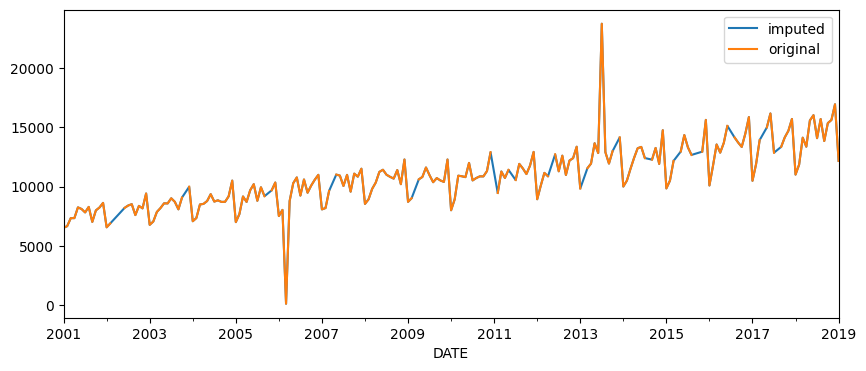

In [ ]:
#Linear Interpolation
mobile_sales.Sales.interpolate(method="linear").plot(label="imputed")
mobile_sales.Sales.plot(label="original")
plt.legend()

In [ ]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method="linear")

#Handling ANomalies

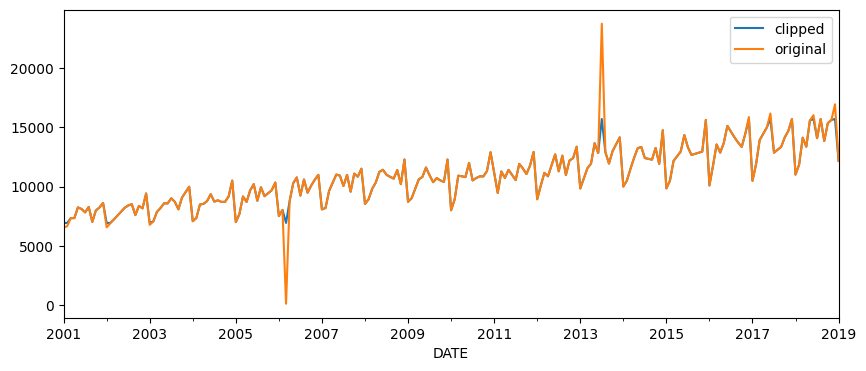

In [ ]:
mobile_sales.Sales.clip(lower = mobile_sales.Sales.quantile(0.025),upper = mobile_sales.Sales.quantile(0.975)).plot(label="clipped")
mobile_sales.Sales.plot(label="original")
plt.legend()

In [ ]:
mobile_sales.Sales = mobile_sales.Sales.clip(lower = mobile_sales.Sales.quantile(0.025),upper = mobile_sales.Sales.quantile(0.975))

In [ ]:
mobile_sales.Sales.rolling(window=3).mean()

DATE
2001-01-01             NaN
2001-02-01             NaN
2001-03-01     7061.866667
2001-04-01     7196.933333
2001-05-01     7634.666667
                  ...     
2018-09-01    14538.333333
2018-10-01    14962.000000
2018-11-01    14934.666667
2018-12-01    15555.733333
2019-01-01    14492.066667
Name: Sales, Length: 217, dtype: float64

In [ ]:
#Centered MA
mobile_sales.Sales.rolling(window=3,center=True).mean()

DATE
2001-01-01             NaN
2001-02-01     7061.866667
2001-03-01     7196.933333
2001-04-01     7634.666667
2001-05-01     7892.000000
                  ...     
2018-09-01    14962.000000
2018-10-01    14934.666667
2018-11-01    15555.733333
2018-12-01    14492.066667
2019-01-01             NaN
Name: Sales, Length: 217, dtype: float64

#Train Test Split

In [ ]:
train_x = mobile_sales[mobile_sales.index<mobile_sales.index[-12]]
test_x = mobile_sales[mobile_sales.index>=mobile_sales.index[-12]]
display(train_x.tail(2))
display(test_x.head(2))

,Sales
DATE,
2017-12-01,15701.2
2018-01-01,11005.0


,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0


In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

#STATIONARITY

<Axes: xlabel='DATE'>

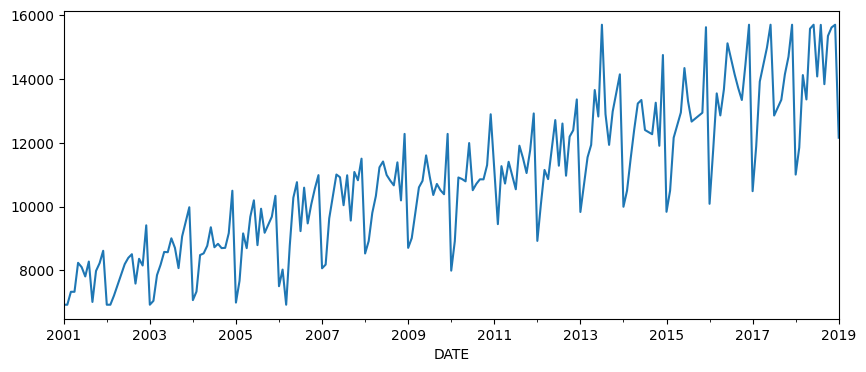

In [ ]:
mobile_sales.Sales.plot()

In [ ]:

import statsmodels.api as sm

In [ ]:
#Augmented Dickey Fuller Test
#H0: Series is non-stationary
p_value = sm.tsa.stattools.adfuller(mobile_sales.Sales)[1]
print(p_value)

0.9794724971863789


In [ ]:
def adf_test(dataset):
   pvalue = sm.tsa.stattools.adfuller(dataset)[1]
   if pvalue <= 0.05:
      print('Sequence is stationary')
   else:
      print('Sequence is not stationary')

adf_test(mobile_sales.Sales)

Sequence is not stationary


# Detrending using Differencing

In [ ]:
mobile_sales.Sales.head()

DATE
2001-01-01    6926.8
2001-02-01    6926.8
2001-03-01    7332.0
2001-04-01    7332.0
2001-05-01    8240.0
Name: Sales, dtype: float64

In [ ]:
mobile_sales.Sales.shift(1).head()

DATE
2001-01-01       NaN
2001-02-01    6926.8
2001-03-01    6926.8
2001-04-01    7332.0
2001-05-01    7332.0
Name: Sales, dtype: float64

<Axes: xlabel='DATE'>

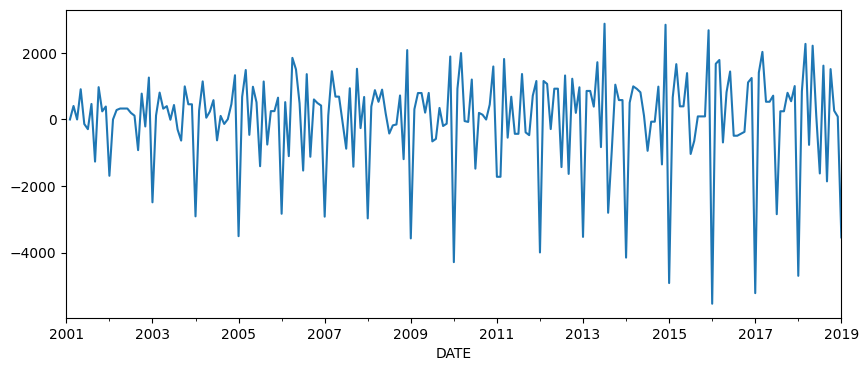

In [ ]:
# de_trend = mobile_sales.Sales - mobile_sales.Sales.shift(1)
de_trend = mobile_sales.Sales.diff(1)
de_trend.plot()

In [ ]:
de_trend.head()

DATE
2001-01-01      NaN
2001-02-01      0.0
2001-03-01    405.2
2001-04-01      0.0
2001-05-01    908.0
Name: Sales, dtype: float64

In [ ]:
adf_test(de_trend.dropna())

Sequence is stationary


#m-differencing to de-seasonalize

<Axes: xlabel='DATE'>

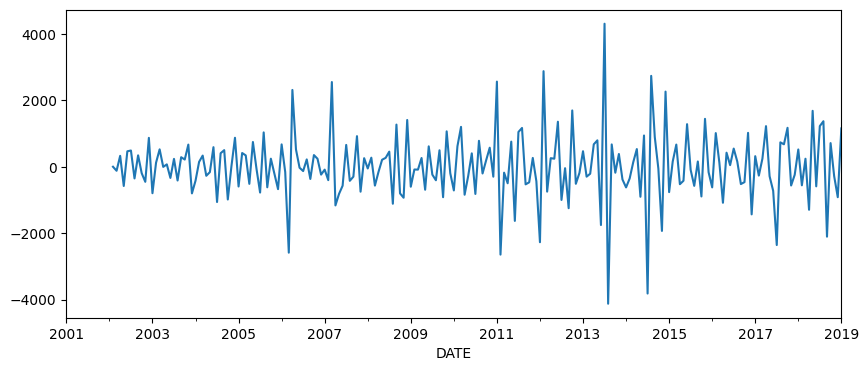

In [ ]:
stationary = de_trend.diff(12)
stationary.plot()

In [ ]:
adf_test(stationary.dropna())

Sequence is stationary


In [ ]:
#obtaining the original series
de_trend.cumsum().head() + mobile_sales.Sales[0]

DATE
2001-01-01       NaN
2001-02-01    6926.8
2001-03-01    7332.0
2001-04-01    7332.0
2001-05-01    8240.0
Name: Sales, dtype: float64

In [ ]:
mobile_sales.Sales.head()

DATE
2001-01-01    6926.8
2001-02-01    6926.8
2001-03-01    7332.0
2001-04-01    7332.0
2001-05-01    8240.0
Name: Sales, dtype: float64

#AutoCorrelation

In [ ]:
np.corrcoef(mobile_sales.Sales[1:],mobile_sales.Sales.shift(1)[1:])[0][1]

0.8014547844414998

In [ ]:
lag = 2
np.corrcoef(mobile_sales.Sales[lag:], mobile_sales.Sales.shift(lag)[lag:])[0][1]

0.7442788337324993

In [ ]:
lag = 3
np.corrcoef(mobile_sales.Sales[lag:], mobile_sales.Sales.shift(lag)[lag:])[0][1]

0.7288327405923439

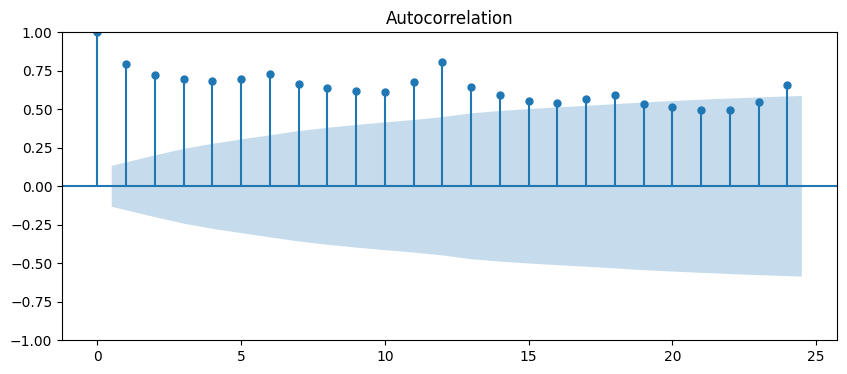

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(mobile_sales.Sales);

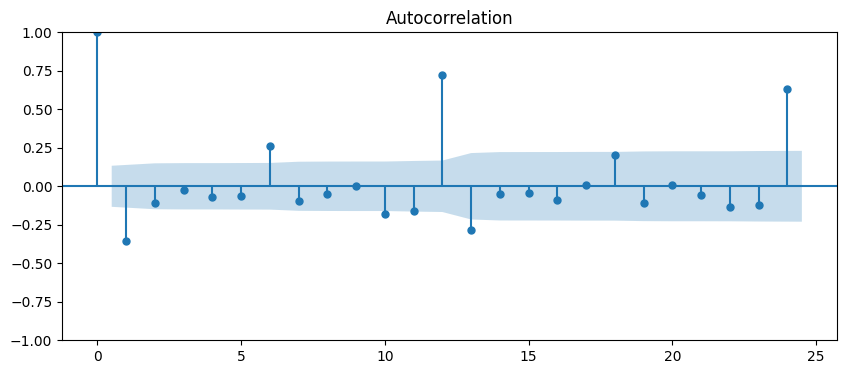

In [ ]:
#Autocorrelation for detrended series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(mobile_sales.Sales.diff(1).dropna());

#Partial Autocorrelation

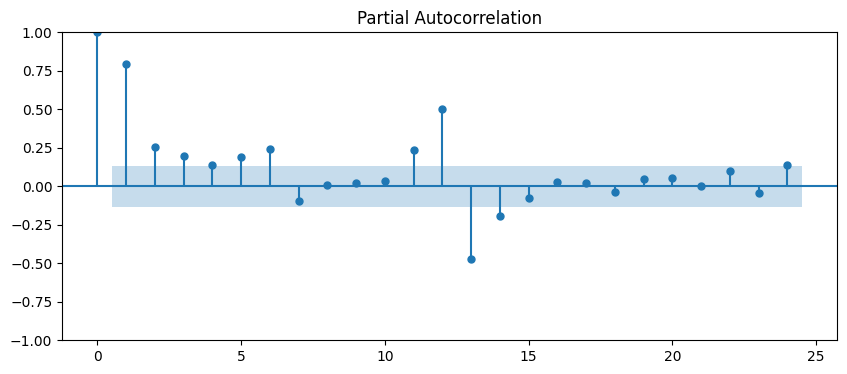

In [ ]:
plot_pacf
plot_pacf(mobile_sales.Sales.dropna());

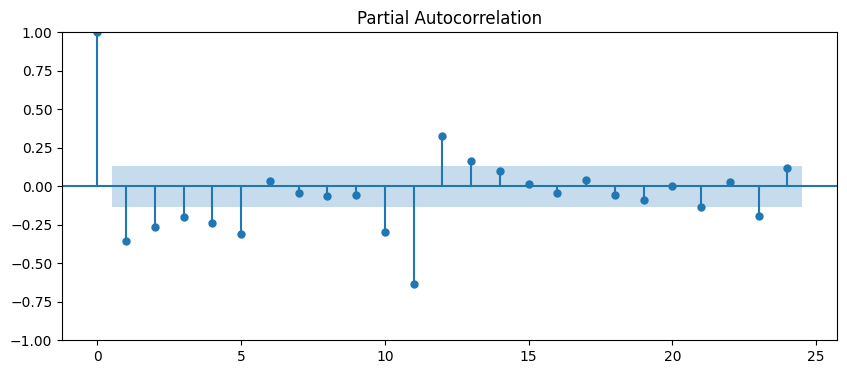

In [ ]:
plot_pacf
plot_pacf(mobile_sales.Sales.diff(1).dropna());

In [ ]:
#PACF is used to judge the order of Moving Average Model
#ACF is used to judge the seasonality and Auto Regression model

#AR Model

In [ ]:
train_x.head()

,Sales
DATE,
2001-01-01,6926.8
2001-02-01,6926.8
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0


In [ ]:
test_x.head()

,Sales
DATE,
2018-02-01,11852.0
2018-03-01,14123.0
2018-04-01,13360.0
2018-05-01,15576.0
2018-06-01,15701.2


In [ ]:
adf_test(train_x.Sales)

Sequence is not stationary


In [ ]:
train_x_st = train_x.copy()
train_x_st.Sales = train_x_st.Sales.diff(1)
train_x_st.dropna(inplace=True)
adf_test(train_x_st.Sales)

Sequence is stationary


In [ ]:
import statsmodels as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train_x_st.Sales, order=(1, 0, 0)) # order = (p,q,d)
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=12)
test_x['pred'].head(20)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-65-bdd0abffa2f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = model.forecast(steps=12)


DATE
2018-02-01    1721.700409
2018-03-01    -631.202312
2018-04-01     231.408645
2018-05-01     -84.838030
2018-06-01      31.102950
2018-07-01     -11.402828
2018-08-01       4.180455
2018-09-01      -1.532620
2018-10-01       0.561883
2018-11-01      -0.205995
2018-12-01       0.075521
2019-01-01      -0.027687
Name: pred, dtype: float64

In [ ]:
# Integrate !!

test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

<ipython-input-66-b273202e7dca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]


In [ ]:
test_x['pred'].head(20)

DATE
2018-02-01    12726.700409
2018-03-01    12095.498097
2018-04-01    12326.906742
2018-05-01    12242.068711
2018-06-01    12273.171661
2018-07-01    12261.768833
2018-08-01    12265.949288
2018-09-01    12264.416668
2018-10-01    12264.978550
2018-11-01    12264.772555
2018-12-01    12264.848076
2019-01-01    12264.820389
Name: pred, dtype: float64

MAE : 2291.462
RMSE : 2564.679
MAPE: 0.153


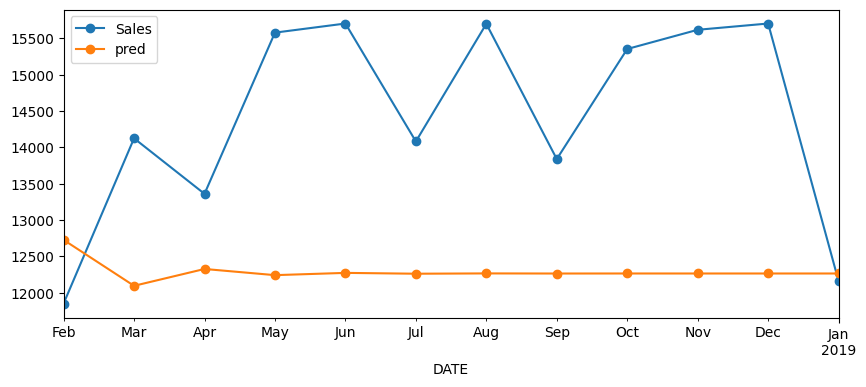

In [ ]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-69-91383b704126>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['pred'] = model.forecast(steps=12)
<ipython-input-69-91383b704126>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

MAE : 1629.392
RMSE : 1866.038
MAPE: 0.109


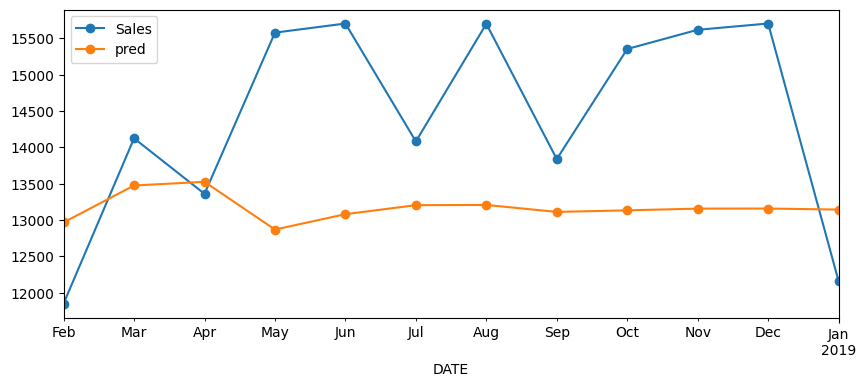

In [ ]:
model = SARIMAX(train_x_st.Sales, order=(3, 0, 0)) # order = (p,q,d)
model = model.fit(disp=False)
test_x['pred'] = model.forecast(steps=12)
test_x['pred'].head(20)

# Integrate !!

test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])


